# 1. Comparing linear and non-linear DR

Bike rental dataset: https://www.openml.org/search?type=data&status=active&id=42712&sort=runs

MNIST_784 dataset: https://www.openml.org/search?type=data&sort=runs&status=active&id=554

In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

## Preprocessing

Decided not to use time-based variables and some others so that there is not too much features. Weather and season are one-hot encoded.  

In [2]:
# Loading dataset into a pandas DataFrame

arff_data = arff.loadarff('dataset.arff')
df = pd.DataFrame(arff_data[0])
df = df.map(lambda x: x.decode() if isinstance(x, bytes) else x) # bytes to strings

# Trying with different variable combinations...


numeric = ['temp', 'windspeed', 'humidity']
categorical = ['season', 'weather']
df['workingday'] = df['workingday'].replace({'False': '0', 'True': '1'}).astype(int)  # convert boolean columns

# Standardization
sc = StandardScaler()
X_numeric = pd.DataFrame(sc.fit_transform(df[numeric]), columns=numeric)
X_categorical = pd.get_dummies(df[categorical]).astype(int)
X_bin = df['workingday']
X_norm = pd.concat([X_numeric, X_categorical, X_bin], axis=1)


Y = df['count']
X_norm

,temp,windspeed,humidity,season_fall,season_spring,season_summer,season_winter,weather_clear,weather_heavy_rain,weather_misty,weather_rain,workingday
0,-1.334648,-1.553889,0.947372,0,1,0,0,1,0,0,0,0
1,-1.438516,-1.553889,0.895539,0,1,0,0,1,0,0,0,0
2,-1.438516,-1.553889,0.895539,0,1,0,0,1,0,0,0,0
3,-1.334648,-1.553889,0.636370,0,1,0,0,1,0,0,0,0
4,-1.334648,-1.553889,0.636370,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-0.211691,-0.141137,0,1,0,0,0,0,1,0,1
17375,-1.230779,-0.211691,-0.141137,0,1,0,0,0,0,1,0,1
17376,-1.230779,-0.211691,-0.141137,0,1,0,0,1,0,0,0,1
17377,-1.230779,-0.456099,-0.348473,0,1,0,0,1,0,0,0,1


## PCA

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      1.773715 -1.063668 -0.989223 -0.589143 -0.267868 -0.669109 -0.572092   
1      1.752182 -1.156473 -1.037329 -0.580026 -0.266863 -0.666962 -0.570398   
2      1.752182 -1.156473 -1.037329 -0.580026 -0.266863 -0.666962 -0.570398   
3      1.547987 -1.066750 -1.174633 -0.496996 -0.260818 -0.643737 -0.575545   
4      1.547987 -1.066750 -1.174633 -0.496996 -0.260818 -0.643737 -0.575545   
...         ...       ...       ...       ...       ...       ...       ...   
17374  0.360935 -1.357761 -0.260214  1.007194 -0.311203 -0.411848  0.291576   
17375  0.360935 -1.357761 -0.260214  1.007194 -0.311203 -0.411848  0.291576   
17376  0.115382 -1.263467 -0.639085 -0.317794 -0.246733 -0.501799  0.415600   
17377  0.121185 -1.209330 -0.938461 -0.229630 -0.230467 -0.495839  0.411556   
17378  0.459778 -1.204707 -0.660346 -0.367850 -0.241041 -0.533897  0.416734   

            PC8       PC9      PC10          PC11  

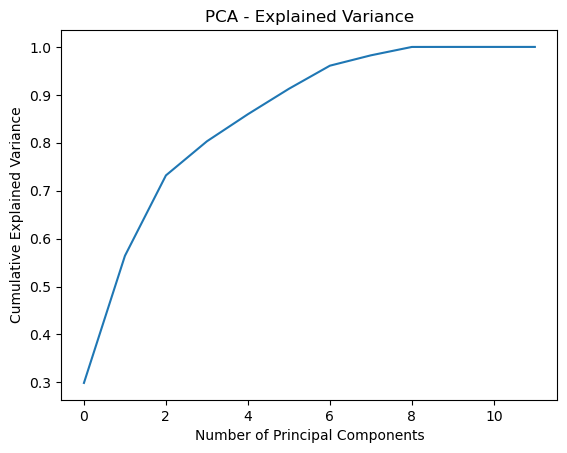

[1.33317389e+00 1.18312272e+00 7.48389112e-01 3.17317224e-01
 2.52204027e-01 2.36549199e-01 2.15016463e-01 9.63973958e-02
 7.80019467e-02 2.29884878e-04 1.13626064e-17 0.00000000e+00]


In [3]:
pca = PCA()
X_pca = pca.fit_transform(X_norm)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(X_pca)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

print(pca.explained_variance_) # 2PCs explain ~75% of variance, also based on Eigenvalues > 1 rule, 2 PCs is fine

## t-SNE

In [ ]:
X_embedded = TSNE(n_components=2, max_iter=500).fit_transform(X_norm) # 2 components


## Visualizing PCA & t-SNE

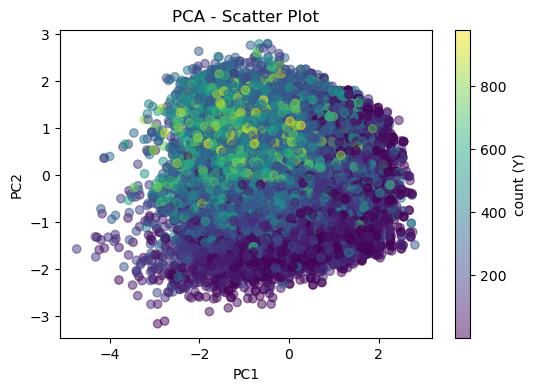

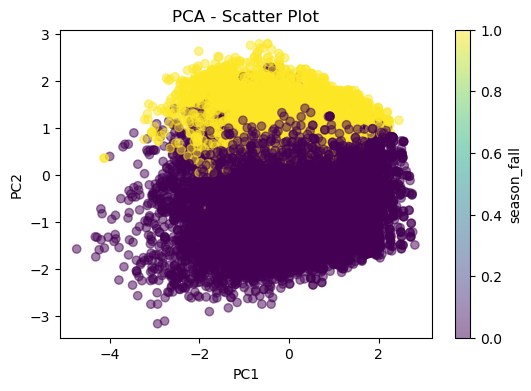

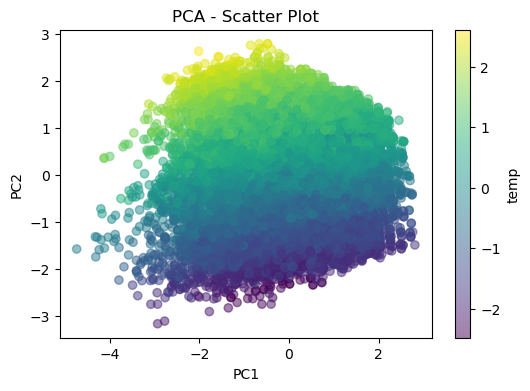

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=Y, cmap='viridis', alpha=0.5)
plt.colorbar(label='count (Y)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Scatter Plot')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_norm['season_fall'], cmap='viridis', alpha=0.5)
plt.colorbar(label='season_fall')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Scatter Plot')
plt.show()
    
plt.figure(figsize=(6,4))
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_norm['temp'], cmap='viridis', alpha=0.5)
plt.colorbar(label='temp')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Scatter Plot')
plt.show()

# 3D PCA plot
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], c=Y, cmap='viridis', alpha=0.5)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('PCA - 3D Scatter Plot')
# ax.view_init(elev=30, azim=40)
# plt.show()

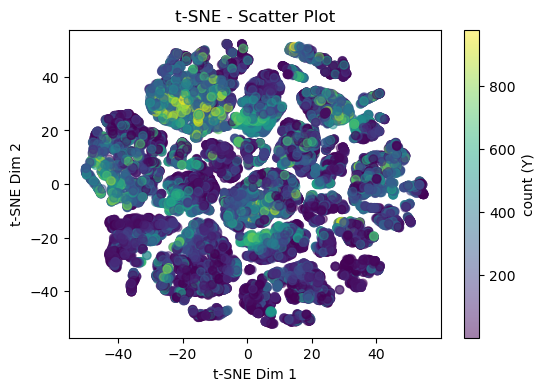

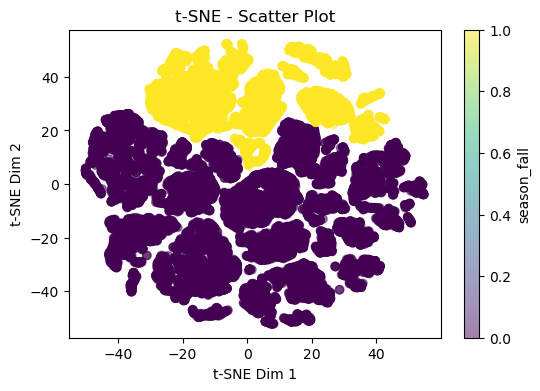

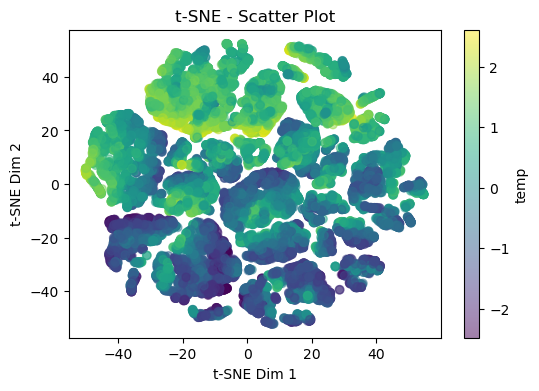

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=Y, cmap='viridis', alpha=0.5)
plt.colorbar(label='count (Y)')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title('t-SNE - Scatter Plot')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=X_norm['season_fall'], cmap='viridis', alpha=0.5)
plt.colorbar(label='season_fall')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title('t-SNE - Scatter Plot')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=X_norm['temp'], cmap='viridis', alpha=0.5)
plt.colorbar(label='temp')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title('t-SNE - Scatter Plot')
plt.show()

#3D t-SNE plot
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], c=Y, cmap='viridis', alpha=0.5)
# ax.set_xlabel('t-SNE Dim 1')
# ax.set_ylabel('t-SNE Dim 2')
# ax.set_zlabel('t-SNE Dim 3')

## Comparison of visualizations

We can note that PCA cannot separate our data into different clusters in 2 dimensions, when first two PCs (explaining around 75% of data variation) are used. Instead, it forms one big data blob. We can still note that different variable values are increasing or decreasing into certain directions. For example the target variable 'count' values are getting larger values at the top left area of the figure. 

t-SNE with 2 dimensions divides data into multiple, different clusters. When looking into numerical values, for example temperature, we can still see that the values increase to certain direction, now top left area in the figure. However, it is not as clear as in PCA and each cluster includes smaller and higher values. Categorical values, such as fall, can be seen in certain areas (belonging to multiple clusters).

This kind of behaviour is expected. PCA is a linear method, and it tries to maximize variance in the data - features with higher variance tend to increase to some directions. On the other hand, t-SNE tries to find local structure and tries to represent similar data points in clusters. 



## Simple MLP model

In [ ]:
#X_pca = X_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

# Testing also standardized tSNE
X_embedded_scaled = StandardScaler().fit_transform(X_embedded)
X_train_tsne_scaled, X_test_tsne_scaled, Y_train_tsne_scaled, Y_test_tsne_scaled = train_test_split(X_embedded_scaled, Y, test_size=0.2, random_state=42)

c:\Users\veeti\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP PCA Test Score: 0.26757456539747093
MLP t-SNE Test Score: 0.20128605372533037
MLP t-SNE Scaled Test Score: 0.07706935900920531
MLP PCA MSE: 23192.55265997217
MLP t-SNE MSE: 25291.60564895201
MLP t-SNE Scaled MSE: 29224.978381993184


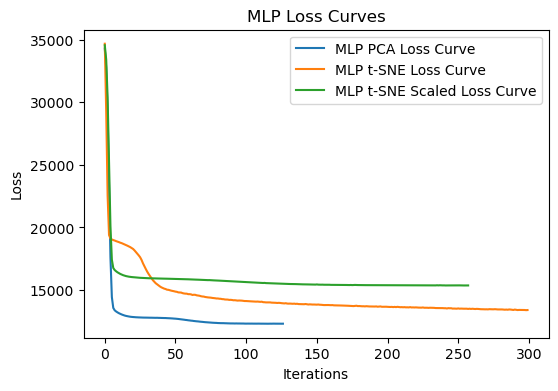

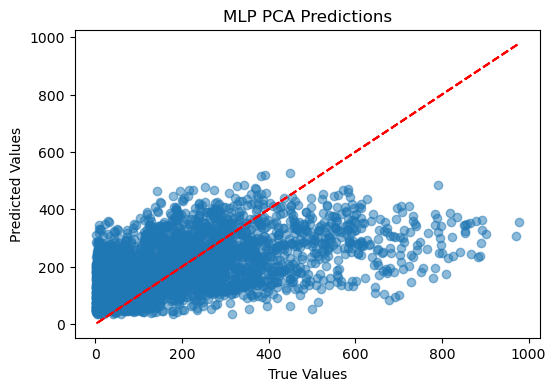

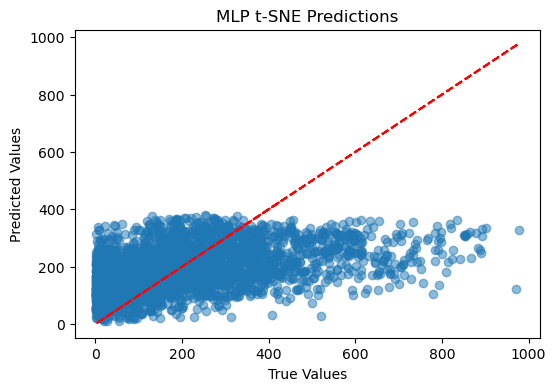

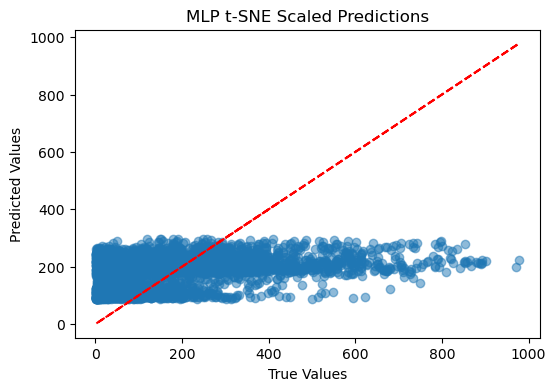

In [19]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
X_train_tsne, X_test_tsne, Y_train_tsne, Y_test_tsne = train_test_split(X_embedded, Y, test_size=0.2, random_state=42)

MLP_pca = MLPRegressor(max_iter = 300, hidden_layer_sizes=(32, 16), learning_rate_init=0.001)
MLP_tsne = MLPRegressor(max_iter = 300, hidden_layer_sizes=(32, 16), learning_rate_init=0.001)
MLP_tsne_2 = MLPRegressor(max_iter = 300, hidden_layer_sizes=(32, 16), learning_rate_init=0.001)

MLP_pca.fit(X_train_pca, Y_train_pca)
MLP_tsne.fit(X_train_tsne, Y_train_tsne)
MLP_tsne_2.fit(X_train_tsne_scaled, y_train_tsne_scaled)

y_pred_pca = MLP_pca.predict(X_test_pca)
y_pred_tsne = MLP_tsne.predict(X_test_tsne)
y_pred_tsne_scaled = MLP_tsne_2.predict(X_test_tsne_scaled)

mse_pca = mean_squared_error(Y_test_pca, y_pred_pca)
mse_tsne = mean_squared_error(Y_test_tsne, y_pred_tsne)
mse_tsne_scaled = mean_squared_error(y_test_tsne_scaled, y_pred_tsne_scaled)

print("MLP PCA Test Score:", MLP_pca.score(X_test_pca, Y_test_pca))
print("MLP t-SNE Test Score:", MLP_tsne.score(X_test_tsne, Y_test_tsne))
print("MLP t-SNE Scaled Test Score:", MLP_tsne_2.score(X_test_tsne_scaled, y_test_tsne_scaled))

print("MLP PCA MSE:", mse_pca)
print("MLP t-SNE MSE:", mse_tsne)
print("MLP t-SNE Scaled MSE:", mse_tsne_scaled)

# Tvisualize training loss curves
plt.figure(figsize=(6,4))
plt.plot(MLP_pca.loss_curve_, label='MLP PCA Loss Curve')
plt.plot(MLP_tsne.loss_curve_, label='MLP t-SNE Loss Curve')
plt.plot(MLP_tsne_2.loss_curve_, label='MLP t-SNE Scaled Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Loss Curves')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(Y_test_pca, y_pred_pca, alpha=0.5)
plt.plot(Y_test_pca, Y_test_pca, color='red', linestyle='--')  
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('MLP PCA Predictions')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(Y_test_tsne, y_pred_tsne, alpha=0.5)
plt.plot(Y_test_tsne, Y_test_tsne, color='red', linestyle='--') 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('MLP t-SNE Predictions')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(Y_test_tsne_scaled, y_pred_tsne_scaled, alpha=0.5)
plt.plot(Y_test_tsne_scaled, Y_test_tsne_scaled, color='red', linestyle='--')
plt.xlabel('True Values')   
plt.ylabel('Predicted Values')
plt.title('MLP t-SNE Scaled Predictions')
plt.show()




## Comparing MLP performance with PCA and t-NSE

A very simple MLP model with two hidden layers was trained using features reduced by both PCA and t-SNE. The MLP results are quite weak with both methods. However, this is quite expected as we only used 2-dimensional training datasets from a very complex original data with a very small MLP. For example 2 PC components only explain 75% of the variance in original data, and we are not including all of its' possible features. Also, time-based variables, which are currently not used, could increase model performance quite much. 

With PCA we still got clearly better results than after t-SNE (also standardization of reduced data after t-NSE was tried), as can be noted from R^2 scores, loss values and loss curves. Also the scatter plots demonstrate that the PCA finds the linear trend at least bit better than t-SNE. The model was tried with using different variable combinations and hyperparameters, more variables, and bigger model, and PCA outperformed t-SNE in almost any possible case. As t-NSE is mainly for visualizing purpose, this is not surprising. Also from the DR visualizations we can see that the 'count' variable values seem to be much more random in t-NSE case compared to PCA. Scatter plots comparing true and predicted values show the weakness of the model but we can note that PCA finds the linear trend at least bit better. 

# 2. Visualizing with SOM

For this task, MiniSom package is used: https://github.com/JustGlowing/minisom

In [2]:
#pip install minisom
from minisom import MiniSom

## Load data

In [3]:
mnist_data = arff.loadarff('mnist_784.arff')
mnist_df = pd.DataFrame(mnist_data[0])
mnist_df = mnist_df.map(lambda x: x.decode() if isinstance(x, bytes) else x) # bytes to strings
num_classes = mnist_df['class'].astype(int) # store class labels
mnist_df.drop(['class'], inplace=True, axis=1)

## Visualizing random image from dataset

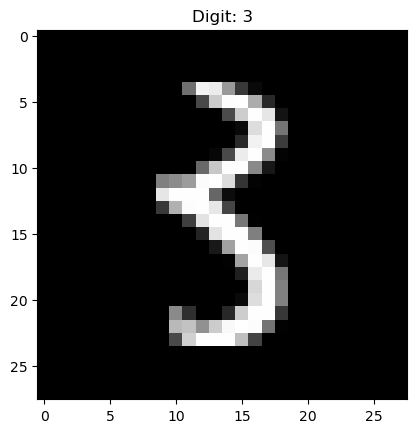

In [4]:
#print(mnist_df.loc[0])
nImgs = len(mnist_df)
randInd = np.random.randint(0, nImgs)

plt.imshow(mnist_df.iloc[randInd].values.reshape(28, 28), cmap='gray')
plt.title(f"Digit: {num_classes[randInd]}")
plt.show()


## Train SOM

In [10]:
numpy_mnist = mnist_df.to_numpy()
numpy_mnist = numpy_mnist / 255.0  # Normalize pixel values to [0, 1]
n_imgs = numpy_mnist.shape[0]
n_features = numpy_mnist.shape[1]
som_size = 20
som = MiniSom(x=som_size, y=som_size, input_len=n_features, sigma=3, learning_rate=0.5)
som.train(numpy_mnist, 1000)

## Visualizing distance map

Credits from visualization part:
https://www.kaggle.com/code/abedi756/self-organizing-maps

https://colab.research.google.com/github/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb#scrollTo=KsFrEay6S87X


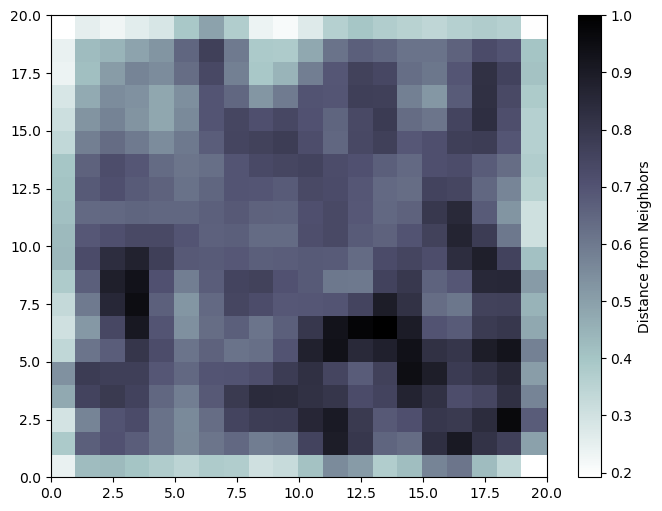

In [14]:
plt.figure(figsize=(8,6))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
plt.colorbar(label='Distance from Neighbors')
plt.show()

## Winner weight markers added

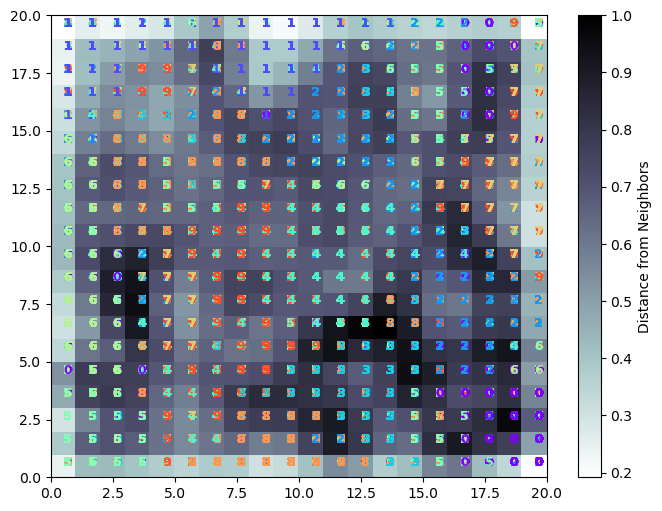

In [13]:
plt.figure(figsize=(8, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
plt.colorbar(label='Distance from Neighbors')
wmap = {}
im = 0
for x, t in zip(numpy_mnist, num_classes):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 9})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

## Results

We trained a simple SOM with 20x20 grid, sigma = 3 and lr = 0.5. We used 70 000 images from MNIST-784 dataset and did 1000 SOM iterations.

In the first figure the average distances between each neuron in SOM can be seen. In the second plot, also the winning neuron markers are added. For each image, one neuron (=pixel in SOM) is the winning neuron, telling that the pixel value is closest to the current image. Each neuron in SOM represents some kind of shape, similar to the digits mapping to this neuron.

From the visualizations we can see that different numbers form multiple, quite clear clusters on our SOM. Also, similarly written numbers, such as 9 and 4, or 3 and 8, tend to be near each other. If we look at the distance map, similar colors seem to form clusters. These can be seen especially well at the borders, for example ones at the upper part of the image and eights at the bottom separate quite well. However, without marker plots, these clusters would be very difficult to see. SOM parameters also naturally affect these visualizations lot. There is also overlapping with the winner neurons and that is why there are multiple numbers for different SOM pixels. 
